In [2]:
import cveig
import matplotlib.pyplot as plt
import numpy as np
from scipy import sparse
import pandas as pd
from scipy import stats

In [3]:
k = 10
n_tries = 10
expected_degrees = np.arange(25, 61, 5)
total_results = []
for degree in expected_degrees:
    results = np.zeros((3,4))
    for i in range(n_tries):
        
        thetas = ['point', 'exp', 'pareto']
        
        for j, theta in enumerate(thetas):
            file = f'../../masters_r/samples/graph_{theta}_{degree}_{i+1}.table'
            print(file)
            adj_matrix = pd.read_table(file, sep=' ').to_numpy()
                
            adj_matrix = sparse.csr_array(adj_matrix)
            results[j, 0] += np.abs(cveig.non_backtracking(adj_matrix, 15) - k)
            results[j, 1] += np.abs(cveig.bethe_hessian(adj_matrix) - k)
            results[j, 2] += np.abs(cveig.eig_cv(adj_matrix, 15, 0.1) - k)
            results[j, 3] += np.abs(cveig.eig_cv_mod(adj_matrix, 15, 0.1) - k)
            
    results /= n_tries
    total_results.append(results)

../../masters_r/samples/graph_point_25_1.table
../../masters_r/samples/graph_exp_25_1.table
../../masters_r/samples/graph_pareto_25_1.table
../../masters_r/samples/graph_point_25_2.table
../../masters_r/samples/graph_exp_25_2.table
../../masters_r/samples/graph_pareto_25_2.table
../../masters_r/samples/graph_point_25_3.table
../../masters_r/samples/graph_exp_25_3.table
../../masters_r/samples/graph_pareto_25_3.table
../../masters_r/samples/graph_point_25_4.table
../../masters_r/samples/graph_exp_25_4.table
../../masters_r/samples/graph_pareto_25_4.table
../../masters_r/samples/graph_point_25_5.table
../../masters_r/samples/graph_exp_25_5.table
../../masters_r/samples/graph_pareto_25_5.table
../../masters_r/samples/graph_point_25_6.table
../../masters_r/samples/graph_exp_25_6.table
../../masters_r/samples/graph_pareto_25_6.table
../../masters_r/samples/graph_point_25_7.table
../../masters_r/samples/graph_exp_25_7.table
../../masters_r/samples/graph_pareto_25_7.table
../../masters_r/samp

In [4]:
import pickle

In [5]:
with open('results2.pickle', 'wb') as f:
    pickle.dump(total_results, f)

In [6]:
point_non_bt = [i[0,0] for i in total_results]
point_bh = [i[0,1] for i in total_results]
point_cveig = [i[0,2] for i in total_results]
#point_cveig_alt = [i[0,3] for i in total_results]
exp_non_bt = [i[1,0] for i in total_results]
exp_bh = [i[1,1] for i in total_results]
exp_cveig = [i[1,2] for i in total_results]
#exp_cveig_alt = [i[0,3] for i in total_results]
pareto_non_bt = [i[2,0] for i in total_results]
pareto_bh = [i[2,1] for i in total_results]
pareto_cveig = [i[2,2] for i in total_results]
#pareto_cveig_mod = [i[0,3] for i in total_results]

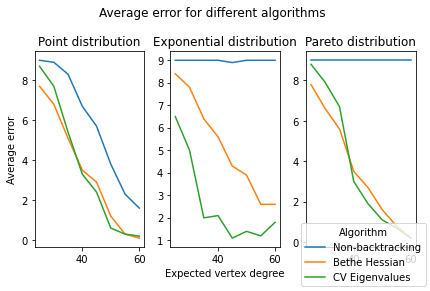

In [16]:
fig, ax = plt.subplots(1,3)
ax[0].plot(expected_degrees, point_non_bt, label='Non-backtracking')
ax[0].plot(expected_degrees, point_bh, label='Bethe Hessian')
ax[0].plot(expected_degrees, point_cveig, label='CV Eigenvalues')
#ax[0].plot(expected_degrees, point_cveig_alt, label='Cross-validated Eigenvalues alt')
ax[0].set_title('Point distribution')
ax[0].set_ylabel('Average error')

ax[1].plot(expected_degrees, exp_non_bt, label='Non-backtracking')
ax[1].plot(expected_degrees, exp_bh, label='Bethe Hessian')
ax[1].plot(expected_degrees, exp_cveig, label='CV Eigenvalues')
#ax[1].plot(expected_degrees, power_cveig_alt, label='Cross-validated Eigenvalues alt')
ax[1].set_title('Exponential distribution')

ax[2].plot(expected_degrees, pareto_non_bt, label='Non-backtracking')
ax[2].plot(expected_degrees, pareto_bh, label='Bethe Hessian')
ax[2].plot(expected_degrees, pareto_cveig, label='CV Eigenvalues')
ax[2].set_title('Pareto distribution')
ax[1].set_xlabel('Expected vertex degree')
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower right', title='Algorithm')
fig.suptitle('Average error for different algorithms')
fig.tight_layout()
fig.savefig('test2.png')

In [8]:
k = 10
n_tries = 10
expected_degrees = np.arange(25, 61, 5)
total_results2 = []
for degree in expected_degrees:
    results = np.zeros((3,4))
    for i in range(n_tries):
        
        thetas = ['point', 'exp', 'pareto']
        
        for j, theta in enumerate(thetas):
            file = f'../../masters_r/samples/graph_{theta}_{degree}_{i+1}.table'
            print(file)
            adj_matrix = pd.read_table(file, sep=' ').to_numpy()
                
            adj_matrix = sparse.csr_array(adj_matrix)
            results[j, 0] += np.abs(cveig.eig_cv(adj_matrix, 15, 0.1) - k)
            results[j, 1] += np.abs(cveig.eig_cv(adj_matrix, 15, 0.3) - k)
            results[j, 2] += np.abs(cveig.eig_cv(adj_matrix, 15, 0.5) - k)
            results[j, 3] += np.abs(cveig.eig_cv(adj_matrix, 15, 0.8) - k)
            
    results /= n_tries
    total_results2.append(results)

../../masters_r/samples/graph_point_25_1.table
../../masters_r/samples/graph_exp_25_1.table
../../masters_r/samples/graph_pareto_25_1.table
../../masters_r/samples/graph_point_25_2.table
../../masters_r/samples/graph_exp_25_2.table
../../masters_r/samples/graph_pareto_25_2.table
../../masters_r/samples/graph_point_25_3.table
../../masters_r/samples/graph_exp_25_3.table
../../masters_r/samples/graph_pareto_25_3.table
../../masters_r/samples/graph_point_25_4.table
../../masters_r/samples/graph_exp_25_4.table
../../masters_r/samples/graph_pareto_25_4.table
../../masters_r/samples/graph_point_25_5.table
../../masters_r/samples/graph_exp_25_5.table
../../masters_r/samples/graph_pareto_25_5.table
../../masters_r/samples/graph_point_25_6.table
../../masters_r/samples/graph_exp_25_6.table
../../masters_r/samples/graph_pareto_25_6.table
../../masters_r/samples/graph_point_25_7.table
../../masters_r/samples/graph_exp_25_7.table
../../masters_r/samples/graph_pareto_25_7.table
../../masters_r/samp

In [9]:
with open('results2_split.pickle', 'wb') as f:
    pickle.dump(total_results2, f)

In [10]:
point_1 = [i[0,0] for i in total_results2]
point_3 = [i[0,1] for i in total_results2]
point_5 = [i[0,2] for i in total_results2]
point_8 = [i[0,3] for i in total_results2]
exp_1 = [i[1,0] for i in total_results2]
exp_3 = [i[1,1] for i in total_results2]
exp_5 = [i[1,2] for i in total_results2]
exp_8 = [i[0,3] for i in total_results2]
pareto_1 = [i[2,0] for i in total_results2]
pareto_3 = [i[2,1] for i in total_results2]
pareto_5 = [i[2,2] for i in total_results2]
pareto_8 = [i[0,3] for i in total_results2]

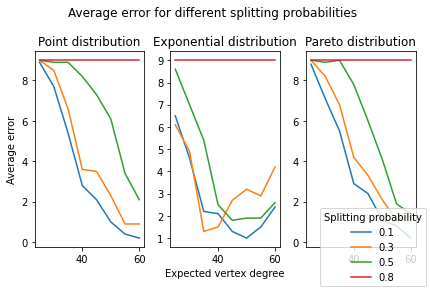

In [12]:
fig, ax = plt.subplots(1,3)
ax[0].plot(expected_degrees, point_1, label='0.1')
ax[0].plot(expected_degrees, point_3, label='0.3')
ax[0].plot(expected_degrees, point_5, label='0.5')
ax[0].plot(expected_degrees, point_8, label='0.8')
ax[0].set_title('Point distribution')
ax[0].set_ylabel('Average error')

ax[1].plot(expected_degrees, exp_1, label='0.1')
ax[1].plot(expected_degrees, exp_3, label='0.3')
ax[1].plot(expected_degrees, exp_5, label='0.5')
ax[1].plot(expected_degrees, exp_8, label='0.8')
ax[1].set_title('Exponential distribution')

ax[2].plot(expected_degrees, pareto_1, label='0.1')
ax[2].plot(expected_degrees, pareto_3, label='0.3')
ax[2].plot(expected_degrees, pareto_5, label='0.5')
ax[2].plot(expected_degrees, pareto_8, label='0.8')
ax[2].set_title('Pareto distribution')
ax[1].set_xlabel('Expected vertex degree')
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower right', title='Splitting probability')
fig.suptitle('Average error for different splitting probabilities')
fig.tight_layout()
fig.savefig('test3.png')